In [1]:
import pandas as pd
import matplotlib
%matplotlib inline 
import numpy as np

In [2]:
### Data transformation from previous notebooks
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

In [4]:
# Data transformation from previous notebook
# col names in tao-all2.col from website
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')

nino = pd.read_csv('data/tao-all2.dat.gz', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])
nino.columns = [x.replace('.', '_').replace(' ', '_') for x in nino.columns]
nino['air_temp_F'] = nino.air_temp_ * 9/5 + 32
wind_cols = [x for x in nino.columns if x.endswith('winds')]
for c in wind_cols:
    nino['{}_mph'.format(c)] = nino[c] * 2.237
pd.to_datetime(nino.date, format='%y%m%d')
nino = nino.drop('obs', axis=1)

In [5]:
nino

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
0,1980-03-07,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24,79.052,-15.2116,1.5659
1,1980-03-08,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97,78.188,-10.9613,2.4607
2,1980-03-09,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28,78.242,-10.0665,4.9214
3,1980-03-10,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31,78.026,-8.5006,4.2503
4,1980-03-11,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19,77.540,-9.3954,3.3555
5,1980-03-12,800312,-0.02,-109.46,-4.4,0.3,NaN,24.72,23.64,76.496,-9.8428,0.6711
6,1980-03-13,800313,-0.02,-109.46,-3.2,0.1,NaN,24.66,24.34,76.388,-7.1584,0.2237
7,1980-03-14,800314,-0.02,-109.46,-3.1,0.6,NaN,25.17,24.14,77.306,-6.9347,1.3422
8,1980-03-15,800315,-0.02,-109.46,-3.0,1.0,NaN,25.59,24.24,78.062,-6.7110,2.2370
9,1980-03-16,800316,-0.02,-109.46,-1.2,1.0,NaN,26.71,25.94,80.078,-2.6844,2.2370


# Basic Stats

A nice feature of pandas is that you can quickly inspect data and get summary statistics.

In [6]:
len(dir(nyc))

473

In [7]:
# The describe method gives us basic stats. The result is a Data Frame
nyc.describe()

,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,...,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3275.000000,...,3275.000000,3277.000000,3277.000000,3277.000000,3245.000000,3244.000000,3177.000000,3286.000000,3277.000000,3285.000000
mean,62.930898,56.042314,48.701674,47.334855,41.676712,35.374125,78.707458,62.108676,45.009132,30.113740,...,29.900043,9.939274,8.663717,6.523955,14.487827,5.826449,22.755430,0.148832,3.231614,193.028919
std,18.006236,16.953644,16.303976,17.901201,18.706095,19.586057,15.652513,14.548359,15.901280,0.209992,...,0.239583,0.406343,2.041796,3.910295,4.355743,2.996004,7.064674,0.432399,2.745582,104.107605
min,16.000000,12.000000,4.000000,-8.000000,-12.000000,-16.000000,28.000000,20.000000,6.000000,29.260000,...,28.530000,5.000000,1.000000,0.000000,3.000000,0.000000,5.000000,0.000000,0.000000,-1.000000
25%,48.000000,42.000000,36.000000,34.000000,27.000000,20.000000,67.000000,51.000000,34.000000,29.970000,...,29.760000,10.000000,8.000000,2.000000,12.000000,4.000000,18.000000,0.000000,1.000000,78.000000
50%,64.000000,57.000000,49.000000,50.000000,43.000000,36.000000,80.000000,62.000000,43.000000,30.100000,...,29.910000,10.000000,10.000000,9.000000,14.000000,5.000000,22.000000,0.000000,3.000000,236.000000
75%,79.000000,71.000000,63.000000,63.000000,58.000000,52.000000,93.000000,73.000000,54.000000,30.250000,...,30.060000,10.000000,10.000000,10.000000,17.000000,7.000000,26.000000,0.050000,6.000000,279.000000
max,104.000000,94.000000,84.000000,77.000000,75.000000,72.000000,100.000000,97.000000,93.000000,30.770000,...,30.590000,10.000000,10.000000,10.000000,99.000000,99.000000,137.000000,7.570000,8.000000,360.000000


In [8]:
# Remember transpose
nyc.describe().T


,count,mean,std,min,25%,50%,75%,max
Max_TemperatureF,3285.0,62.930898,18.006236,16.00,48.00,64.00,79.00,104.00
Mean_TemperatureF,3285.0,56.042314,16.953644,12.00,42.00,57.00,71.00,94.00
Min_TemperatureF,3285.0,48.701674,16.303976,4.00,36.00,49.00,63.00,84.00
Max_Dew_PointF,3285.0,47.334855,17.901201,-8.00,34.00,50.00,63.00,77.00
MeanDew_PointF,3285.0,41.676712,18.706095,-12.00,27.00,43.00,58.00,75.00
Min_DewpointF,3285.0,35.374125,19.586057,-16.00,20.00,36.00,52.00,72.00
Max_Humidity,3285.0,78.707458,15.652513,28.00,67.00,80.00,93.00,100.00
Mean_Humidity,3285.0,62.108676,14.548359,20.00,51.00,62.00,73.00,97.00
Min_Humidity,3285.0,45.009132,15.901280,6.00,34.00,43.00,54.00,93.00
Max_Sea_Level_PressureIn,3275.0,30.113740,0.209992,29.26,29.97,30.10,30.25,30.77


In [10]:
nyc.shape

(3287, 23)

In [9]:
# to view non-numeric data pass include='all'
nyc.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
EST,3287,3287,2007-09-10 00:00:00,1,2006-01-01 00:00:00,2014-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_TemperatureF,3285,NaN,NaN,NaN,NaN,NaN,62.9309,18.0062,16,48,64,79,104
Mean_TemperatureF,3285,NaN,NaN,NaN,NaN,NaN,56.0423,16.9536,12,42,57,71,94
Min_TemperatureF,3285,NaN,NaN,NaN,NaN,NaN,48.7017,16.304,4,36,49,63,84
Max_Dew_PointF,3285,NaN,NaN,NaN,NaN,NaN,47.3349,17.9012,-8,34,50,63,77
MeanDew_PointF,3285,NaN,NaN,NaN,NaN,NaN,41.6767,18.7061,-12,27,43,58,75
Min_DewpointF,3285,NaN,NaN,NaN,NaN,NaN,35.3741,19.5861,-16,20,36,52,72
Max_Humidity,3285,NaN,NaN,NaN,NaN,NaN,78.7075,15.6525,28,67,80,93,100
Mean_Humidity,3285,NaN,NaN,NaN,NaN,NaN,62.1087,14.5484,20,51,62,73,97
Min_Humidity,3285,NaN,NaN,NaN,NaN,NaN,45.0091,15.9013,6,34,43,54,93


In [13]:
len(set(dir(nyc.EST)) & set(dir(nyc)))

390

In [15]:
nyc.mad

<bound method NDFrame._add_numeric_operations.<locals>.mad of             EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0    2006-01-01              42.0               37.0              32.0   
1    2006-01-02              48.0               44.0              39.0   
2    2006-01-03              40.0               37.0              33.0   
3    2006-01-04              38.0               34.0              29.0   
4    2006-01-05              50.0               44.0              37.0   
5    2006-01-06              43.0               37.0              30.0   
6    2006-01-07              35.0               30.0              25.0   
7    2006-01-08              46.0               40.0              34.0   
8    2006-01-09              60.0               52.0              43.0   
9    2006-01-10              49.0               45.0              41.0   
10   2006-01-11              52.0               47.0              42.0   
11   2006-01-12              57.0               51

In [17]:
nyc.hasnans

AttributeError: 'DataFrame' object has no attribute 'hasnans'

In [ ]:
# Various aggregation methods (max, mean, median, min, mad, skew, kurtosis, autocorr,
#   nunique, sem, std, var)
# and properties (hasnans, is_monotonic, is_unique)
nyc.Max_Humidity.max()

In [18]:
nyc.Max_Humidity.quantile(.2)

64.0

In [19]:
nyc.Max_Humidity.quantile([.2,.3])

0.2    64.0
0.3    70.0
Name: Max_Humidity, dtype: float64

In [ ]:
nyc.Max_Humidity.min()

In [24]:
##nino.describe().T
nino.latitude.max()
nino.

9.05

In [ ]:
nyc.Mean_Humidity.corr(nyc.Mean_TemperatureF)

## Basic Stats Assignment
With the nino dataset:

* *Describe* the data
* Choose a column
  * Print out the max, min, and mean
* Correlate (``corr``) the temperature column with the date column (might need to use ``.astype('int64')`` method)

In [26]:
nino.describe().T

,count,mean,std,min,25%,50%,75%,max
date,178080.0,933689.455374,33900.474320,800307.0000,920116.0000,940601.0000,960617.0000,980623.0000
latitude,178080.0,0.473626,4.583041,-8.8100,-2.0100,0.0100,4.9800,9.0500
longitude,178080.0,-54.025233,135.363994,-180.0000,-154.9500,-111.2600,147.0100,171.0800
zon_winds,152917.0,-3.304772,3.373492,-12.4000,-5.8000,-4.0000,-1.4000,14.3000
mer_winds,152918.0,0.249762,2.999202,-11.6000,-1.7000,0.3000,2.3000,13.0000
humidity,112319.0,81.236525,5.313061,45.4000,77.7000,81.2000,84.8000,99.9000
air_temp_,159843.0,26.887567,1.816429,17.0500,26.0600,27.3400,28.1800,31.6600
s_s_temp_,161073.0,27.715309,2.057428,17.3500,26.7700,28.2900,29.2300,31.2600
air_temp_F,159843.0,80.397620,3.269572,62.6900,78.9080,81.2120,82.7240,88.9880
zon_winds_mph,152917.0,-7.392775,7.546501,-27.7388,-12.9746,-8.9480,-3.1318,31.9891


In [34]:
nino.humidity.agg([max,min])



max    99.9
min    45.4
Name: humidity, dtype: float64

## Basic Stats Extra
* use the ``scatter_matrix`` function in ``pandas.plotting`` to create a correlation matrix (note this might take tens of seconds to run)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1d5e05fd0>,
      dtype=object)

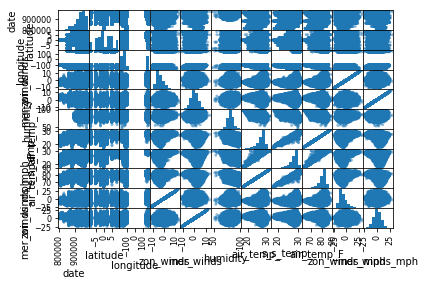

In [35]:
pd.plotting.scatter_matrix(nino)

# Plotting

Pandas has built-in integration with Matplotlib. Other libraries such as Seaborn also support plotting DataFrames and Series. This is not an in depth intro to Matplotlib, but their website and gallery are great for finding more information

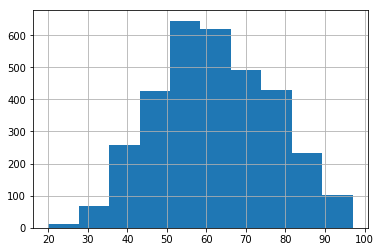

In [36]:
# histograms are a quick way to visualize the distribution
nyc.Mean_Humidity.hist()

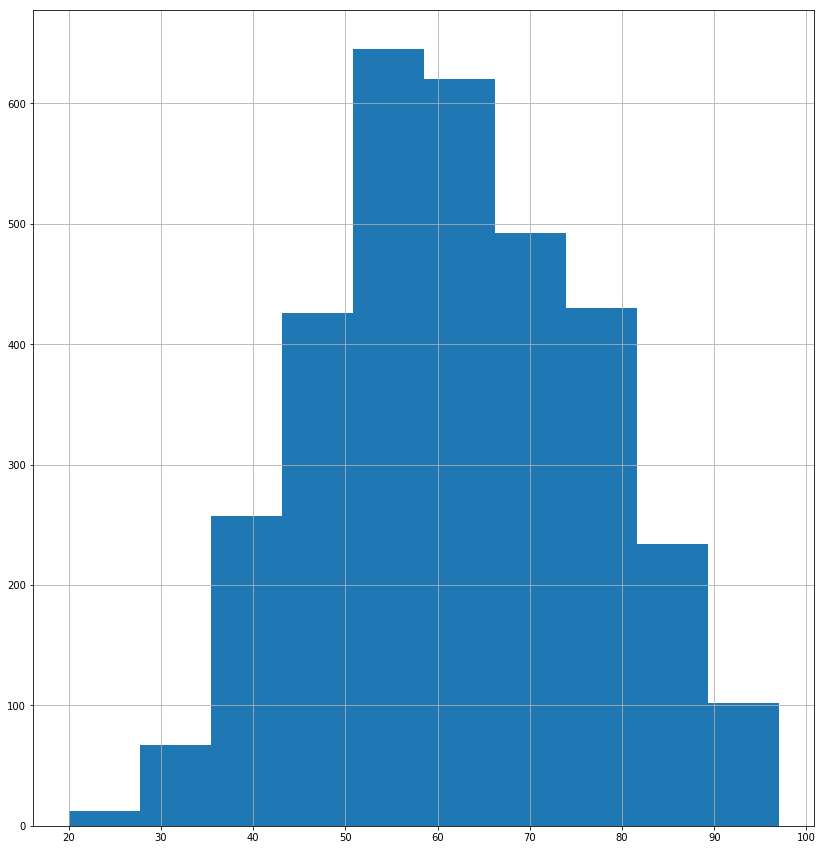

In [40]:
# add in figsize=(width,height) to boost size
nyc.Mean_Humidity.hist(figsize=(14, 15))

In [ ]:
# If we use the .plot method we can add title and other attributes
nyc.Mean_Humidity.plot(kind='hist', title='Avg Humidity', figsize=(14, 10))

In [ ]:
nyc.plot(x='EST', y='Mean_Humidity')

In [ ]:
nyc.plot(x='EST', y='Mean_Humidity', figsize=(12, 8) )

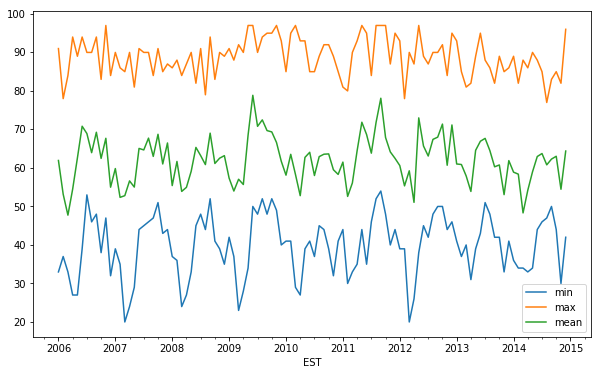

In [74]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
(nyc
    .set_index('EST')
    .Mean_Humidity
    .resample('M')
    .agg(['min','max','mean'])
    .plot(figsize=(10, 6)) 
)

In [ ]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
nyc.set_index('EST').Mean_Humidity.resample('2W').mean().plot(figsize=(10, 6)) 

In [ ]:
# Plot all the things (may be useful or just art)
nyc.set_index('EST').plot(figsize=(12,8))

In [ ]:
nyc.plot(x='Max_TemperatureF', y='Max_Humidity', kind='scatter', alpha=.5, 
        figsize=(10, 8))

In [ ]:
nyc.Max_TemperatureF.corr(nyc.Max_Humidity)

## Plotting Assignment
With the nino dataset:
* Plot a histogram of air temp
* Plot a scatter plot of latitude and longitude


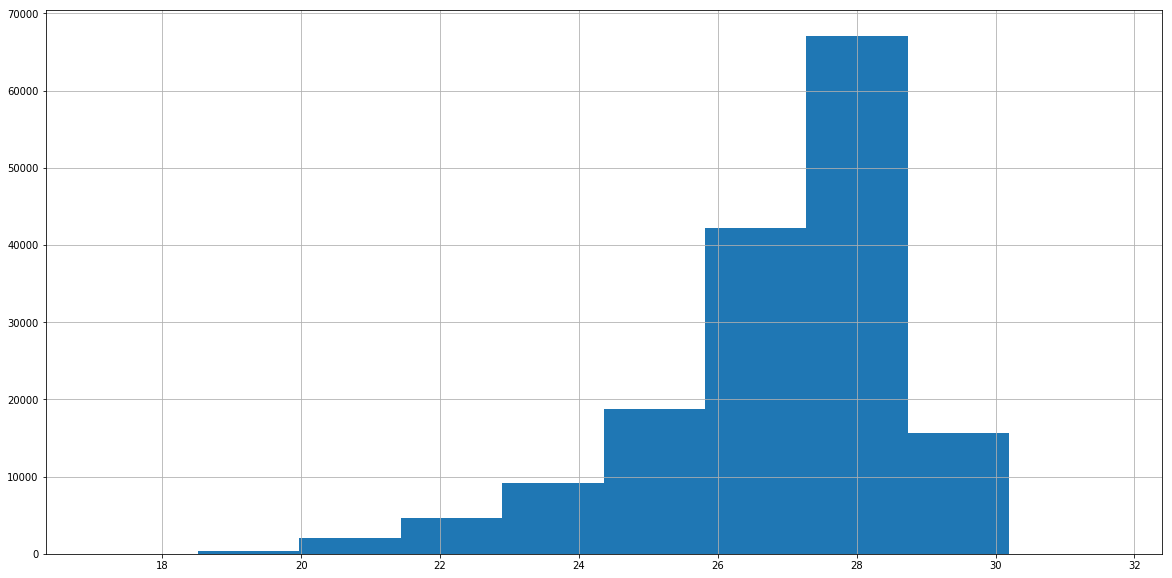

In [58]:
a=nino.air_temp_.hist(figsize=(20,10))
##nino.describe().T

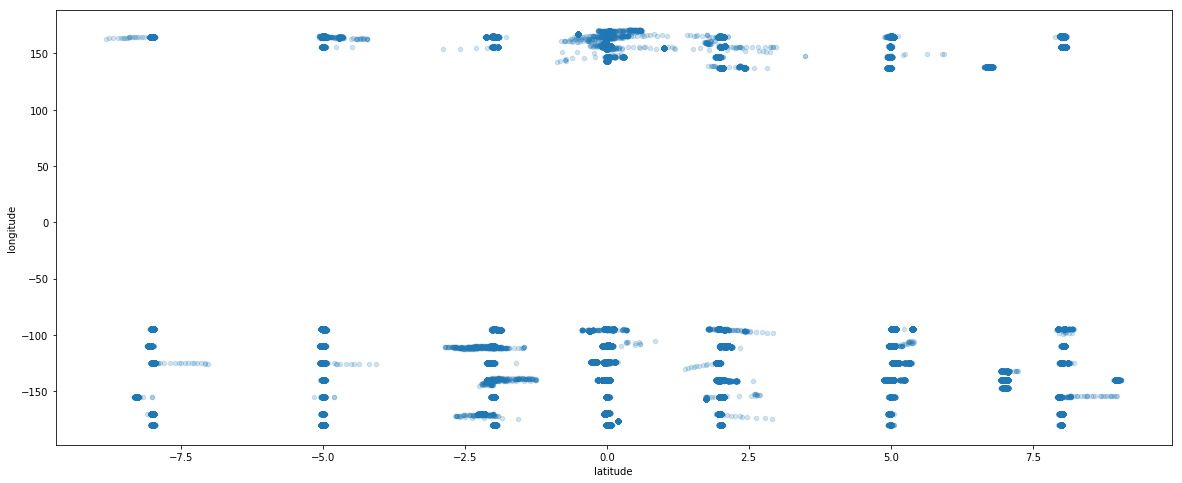

In [54]:
nino.plot(x='latitude',y='longitude',kind='scatter',alpha=0.2,figsize=(20,8))

# Filtering

In [96]:
# When we apply a conditional operator to a series we get back a series of True/False values
# We call this a "mask", which we can use to filter (similar to Photoshop)
# all EST in 2000's
m2000 = nyc.EST.dt.year >= 2000

# below 2010
lt2010 = nyc.EST.dt.year < 2010
m2000



0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
3257    True
3258    True
3259    True
3260    True
3261    True
3262    True
3263    True
3264    True
3265    True
3266    True
3267    True
3268    True
3269    True
3270    True
3271    True
3272    True
3273    True
3274    True
3275    True
3276    True
3277    True
3278    True
3279    True
3280    True
3281    True
3282    True
3283    True
3284    True
3285    True
3286    True
Name: EST, Length: 3287, dtype: bool

In [ ]:
# The "and" operation looks at whether the operands are truthy or falsey
# This is a case where normal Python syntax doesn't work
nyc[m2000 and lt2010]

In [ ]:
# & does bitwise comparisons - which is what we want
nyc[m2000 & lt2010]

In [ ]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[nyc.EST.dt.year >= 2000 & nyc.EST.dt.year < 2010]

In [ ]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[(nyc.EST.dt.year >= 2000) & (nyc.EST.dt.year < 2010)]

In [ ]:
m_dec = nyc.EST.dt.month == 12
nyc[m_dec]

In [ ]:
# Can use loc to filter out based on index value, also takes a boolean index
# In fact, you should use .loc instead as a matter of habit (you won't see warnings)
nyc.loc[m_dec]

In [ ]:
# Can use loc to filter out based on index value, also takes a boolean index
# 2nd option in index op is column names (: to include everything)
nyc.loc[m_dec, [x for x in nyc.columns if 'Max' in x]]

In [ ]:
# loc note:
# can use set_index and sort_index to do quick lookups (if you sort you get quick lookups)
nyc.set_index('Events').sort_index().head()

In [ ]:
nyc.set_index('Events').sort_index().loc['Fog']

In [ ]:
# Can use iloc to filter out based on index location (or position)
# 2nd option in index op is column indices
nyc.iloc[5:10, [2, 5, -2]]  


In [ ]:
# Can use iloc to filter out based on index location
# 2nd option in index op is column indices
nyc.iloc[:, [2, 5, -2]]  


In [ ]:
nyc.EST.describe()

## Filtering Assignment
Using the nino dataframe:
* Create a mask, ``m80``, that all years >= 1980 and < 1990
* Create a mask, ``m90``, that all years >= 1990 and < 2000
* Create a mask, ``lon120``, that has all longitudes > 120
* Create a mask, ``lat0``, that has latitudes > -2 and < 2
* Create a dataframe, ``df80``, that has only those values in ``m80`` and ``lon120`` and ``lat0``
* Create a dataframe, ``df90``, that has only those values in ``m90`` and ``lon120`` and ``lat0``


In [97]:
m80=(nino.year_month_day.dt.year>=1980)&(nino.year_month_day.dt.year<1990)


0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
178050    False
178051    False
178052    False
178053    False
178054    False
178055    False
178056    False
178057    False
178058    False
178059    False
178060    False
178061    False
178062    False
178063    False
178064    False
178065    False
178066    False
178067    False
178068    False
178069    False
178070    False
178071    False
178072    False
178073    False
178074    False
178075    False
178076    False
178077    False
178078    False
178079    False
Name: year_month_day, Le

In [81]:
m90=(nino.year_month_day.dt.year>=1990)&(nino.year_month_day.dt.year<2000)

In [83]:
lon120=nino.longitude>120

In [84]:
lat0=(nino.latitude>-2)&(nino.latitude<2)

In [103]:
df80=nino[m80&lon120&lat0]
df80.shape


(3334, 12)

In [90]:
df90=nino.loc[m90 & lon120 & lat0]
df90

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
15098,1992-04-26,920426,0.03,143.03,0.7,1.2,73.0,28.63,29.70,83.534,1.5659,2.6844
15099,1992-04-27,920427,0.03,143.04,-0.6,3.3,78.5,28.44,29.59,83.192,-1.3422,7.3821
15100,1992-04-28,920428,0.02,143.02,-2.1,4.8,77.3,28.87,29.31,83.966,-4.6977,10.7376
15101,1992-04-29,920429,0.02,143.03,-1.1,4.7,75.4,28.79,29.30,83.822,-2.4607,10.5139
15102,1992-04-30,920430,0.02,143.03,-0.4,2.5,78.5,28.44,29.40,83.192,-0.8948,5.5925
15103,1992-05-01,920501,0.02,143.03,-0.4,-0.2,79.3,28.40,29.55,83.120,-0.8948,-0.4474
15104,1992-05-02,920502,0.02,143.03,-1.7,1.9,78.5,28.55,29.59,83.390,-3.8029,4.2503
15105,1992-05-03,920503,0.02,143.03,-2.4,0.8,77.7,28.75,29.54,83.750,-5.3688,1.7896
15106,1992-05-04,920504,0.02,143.03,-1.5,-1.3,79.7,28.32,29.56,82.976,-3.3555,-2.9081
15107,1992-05-05,920505,0.02,143.03,-2.5,-0.4,81.3,28.36,29.47,83.048,-5.5925,-0.8948


## Filtering Bonus Assignment
* Create a mask, ``m80_2``, that uses a function to filter years >= 1980 and < 1990
* Make sure that ``m80`` is created using operations
* Use the ``%%time`` *cell magic* to determine which is faster to calculate, ``m80`` or ``m80_2``

In [99]:
m80_2=[x for x in nino.year_month_day.dt.year if (x>=1980) & (x<1990) ]
m80_2

[1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,
 1980,

# Dealing with NaN

In [104]:
# find rows that have null data
# fish create a mask
nyc.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3257    False
3258    False
3259    False
3260    False
3261    False
3262    False
3263    False
3264    False
3265    False
3266    False
3267    False
3268    False
3269    False
3270    False
3271    False
3272    False
3273    False
3274    False
3275    False
3276    False
3277    False
3278    False
3279    False
3280    False
3281    False
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [105]:
nyc[nyc.isnull().any(axis=1)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
86,2006-03-28,55.0,49.0,43.0,31.0,25.0,21.0,58.0,41.0,29.0,...,10.0,10.0,10.0,10.0,5.0,NaN,0.000,3.0,,93.0
87,2006-03-29,63.0,52.0,41.0,34.0,26.0,21.0,73.0,41.0,23.0,...,10.0,10.0,10.0,12.0,5.0,NaN,0.000,0.0,,129.0
103,2006-04-14,66.0,60.0,53.0,55.0,49.0,41.0,100.0,74.0,43.0,...,10.0,6.0,2.0,10.0,3.0,NaN,0.210,5.0,Rain,137.0
116,2006-04-27,73.0,60.0,48.0,37.0,32.0,28.0,59.0,37.0,21.0,...,10.0,10.0,10.0,8.0,5.0,NaN,0.000,2.0,,299.0
123,2006-05-04,82.0,66.0,53.0,53.0,49.0,39.0,94.0,62.0,23.0,...,10.0,10.0,10.0,9.0,4.0,NaN,0.000,1.0,,215.0
124,2006-05-05,80.0,72.0,64.0,52.0,44.0,37.0,58.0,39.0,23.0,...,10.0,10.0,10.0,9.0,5.0,NaN,0.000,0.0,,294.0
129,2006-05-10,69.0,60.0,53.0,54.0,49.0,46.0,83.0,70.0,56.0,...,10.0,10.0,7.0,10.0,5.0,NaN,0.000,8.0,,34.0
144,2006-05-25,75.0,66.0,57.0,52.0,45.0,36.0,63.0,45.0,33.0,...,10.0,10.0,10.0,10.0,4.0,NaN,0.000,0.0,,240.0
145,2006-05-26,73.0,66.0,59.0,65.0,61.0,54.0,96.0,81.0,69.0,...,10.0,4.0,0.0,7.0,2.0,NaN,0.240,4.0,Fog-Rain,45.0
148,2006-05-29,88.0,76.0,66.0,68.0,63.0,57.0,84.0,66.0,44.0,...,10.0,8.0,5.0,7.0,3.0,NaN,0.010,1.0,,215.0


In [ ]:
# Find columns with null values
nyc.isnull()

In [ ]:
# Find columns with null values
nyc.isnull().any()

In [ ]:
missing_df = nyc.isnull() 
nyc[missing_df.Max_TemperatureF]

In [119]:
(nyc
 .Max_TemperatureF
 .fillna(nyc.Max_TemperatureF.mean())
 .iloc[2219:2222]
)

##nyc.Max_TemperatureF.iloc[2221]

55.0

In [ ]:
# The .interpolate method will do linear interpolation by default
nyc.Max_TemperatureF.interpolate().iloc[2219:2222]

In [ ]:
#dropping rows with missing data
nyc.dropna()

## Dealing with NaN Assignment
With the nino dataset:
* Find the rows that have null data
* Find the columns that have null data
* It looks like the ``zon_winds`` has some missing values, use summary stats or plotting to determine how to fill in those values

In [123]:
nino.isna().any()

year_month_day    False
date              False
latitude          False
longitude         False
zon_winds          True
mer_winds          True
humidity           True
air_temp_          True
s_s_temp_          True
air_temp_F         True
zon_winds_mph      True
mer_winds_mph      True
dtype: bool